# Emotions Reconition in Text

In [1]:
#pip install neattext
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install neattext
#pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators

from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Loading the dataset

In [3]:
df = pd.read_csv("C:\\Emotion Recognition For Text\\data\\emotion_dataset_raw.csv")

In [4]:
df.head(15)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...


In [5]:
df.tail(15)

,Emotion,Text
34777,joy,Taking a break from studying just to go to yet...
34778,joy,"In other news, my mum made EFO."
34779,anger,Love when i dont beat my highscore in doodleju...
34780,surprise,"why is my paper not finished? oh that's right,..."
34781,fear,"Tom Shakeshaft , who is 15 , reveals his disma..."
34782,fear,"@JulieCarney27 world of pain... But, got up,bo..."
34783,neutral,Not yet .
34784,joy,~ As musicas que nois danço com os munitores t...
34785,joy,When I understood that I was admitted to the U...
34786,joy,Tuesday woken up to Oscar and Cornet practice X


In [6]:
print(df.shape)

(34792, 2)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [8]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [9]:
# Value Counts of emotions
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

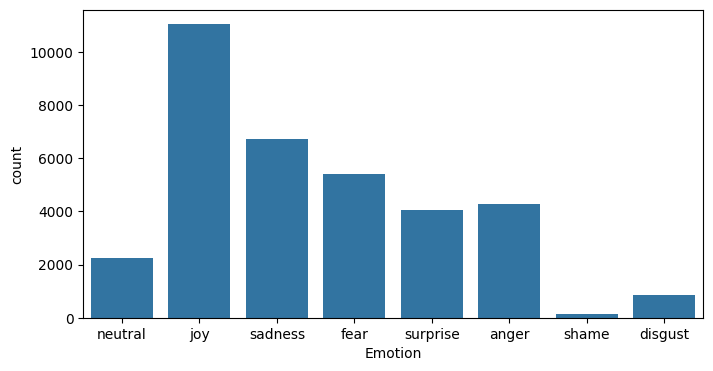

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df);

# Data pre-Processing

In [11]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [12]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
print(df.columns)


Index(['Emotion', 'Text', 'Clean_Text'], dtype='object')


In [14]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [15]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


# Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable

In [16]:
X = df['Clean_Text']
y = df['Emotion']

In [17]:
X

0                                                        ?
1                          Sage Act upgrade list tommorow.
2        WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3        eye ! true hazel eye-and brilliant ! Regular f...
4        ugh babe.. hugggzzz u .! babe naamazed nga ako...
                               ...                        
34787      gift! Hope like it! hand wear ! It'll warm! Lol
34788      world didnt me..so world DEFINITELY cnt away!!!
34789                                   man robbed today .
34790                        Youu JEALOUSY, #Losing YOU...
34791                               think baby, dream time
Name: Clean_Text, Length: 34792, dtype: object

In [18]:
y

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

# Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model's knowledge capability.

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=115)

# Traning the model

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6365857163385544

In [22]:
pipe_lr.score(x_train,y_train)

0.8859267775661984

In [23]:
ex2 =  "Sadness is an emotional pain associated with, or characterized by, feelings of disadvantage, loss, despair, grief, helplessness, disappointment and sorrow."
pipe_lr.predict([ex2])

array(['sadness'], dtype=object)

In [24]:
y_pred=pipe_lr.predict(y_test)
accuracy_score(y_test, y_pred, normalize=False)

6747

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00       878
     disgust       0.00      0.00      0.00       189
        fear       1.00      1.00      1.00      1061
         joy       1.00      1.00      1.00      2211
     neutral       0.68      1.00      0.81       457
     sadness       1.00      1.00      1.00      1335
       shame       0.00      0.00      0.00        23
    surprise       1.00      1.00      1.00       805

    accuracy                           0.97      6959
   macro avg       0.71      0.75      0.73      6959
weighted avg       0.95      0.97      0.96      6959



c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [26]:
pipe_svm = Pipeline(steps=[('cv', CountVectorizer()), ('svc', SVC(kernel='rbf', C=10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6338554389998563

In [27]:
pipe_svm.score(x_train,y_train)

0.9917364279811735

In [28]:
ex2 = "Sadness is an emotional pain associated with, or characterized by, feelings of disadvantage, loss, despair, grief, helplessness, disappointment and sorrow."
pipe_svm.predict([ex2])

array(['sadness'], dtype=object)

In [29]:
y_pred=pipe_svm.predict(y_test)
accuracy_score(y_test, y_pred, normalize=False)

5412

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.82      1.00      0.90       878
     disgust       0.00      0.00      0.00       189
        fear       1.00      1.00      1.00      1061
         joy       1.00      1.00      1.00      2211
     neutral       0.25      1.00      0.40       457
     sadness       0.00      0.00      0.00      1335
       shame       0.00      0.00      0.00        23
    surprise       1.00      1.00      1.00       805

    accuracy                           0.78      6959
   macro avg       0.51      0.62      0.54      6959
weighted avg       0.71      0.78      0.73      6959



c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [31]:
pipe_rf = Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5670354936054031

In [32]:
pipe_rf.score(x_train,y_train)

0.9809937843566989

In [33]:
ex2 = "Sadness is an emotional pain associated with, or characterized by, feelings of disadvantage, loss, despair, grief, helplessness, disappointment and sorrow."
pipe_rf.predict([ex2])

array(['sadness'], dtype=object)

In [34]:
y_pred=pipe_rf.predict(y_test)
accuracy_score(y_test, y_pred, normalize=False)

6747

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.82      1.00      0.90       878
     disgust       0.00      0.00      0.00       189
        fear       1.00      1.00      1.00      1061
         joy       1.00      1.00      1.00      2211
     neutral       0.95      1.00      0.98       457
     sadness       1.00      1.00      1.00      1335
       shame       0.00      0.00      0.00        23
    surprise       1.00      1.00      1.00       805

    accuracy                           0.97      6959
   macro avg       0.72      0.75      0.73      6959
weighted avg       0.94      0.97      0.96      6959



c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahesm\AppData\Local\Programs\Orange\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Saving the model

In [36]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()